**<font size=5> Module Title: Machine Learning for AI </font>**

**<font size=5> Assessment Title: ML_CA1 </font>**

**<font size=4> Lecturer Name: Dr. David McQuaid </font>**

**<font size=4> Student Name: Chia Hua Lin &emsp; &emsp; ID: 2020044 </font>**

**<font size=3> GitHub Link: https://github.com/Awa25/ML_CA1 </font>**

### Scenario:

This is a data set which contains over 65K attempts to access a firewall. There is a single categorical feature “Action”, that contains 4 categories – “allow, deny, drop, reset-both”.
Your task is to create a classification model that will predict the class of incoming traffic to the firewall.

### Requirements

You are required to use the dataset contained within the file “log2.csv” and then perform the following analysis by testing at least 2 classification algorithms:

- Perform an initial analysis of the data (EDA) using python in your Jupyter notebook. Discuss your findings and what relevance they might have on your planned classification algorithms. [0-20]
- Perform any preparation of the data, that you feel is necessary, using python in your Jupyter notebook. Explain your rationale behind your data preparation and how it will assist you.[0-30]
- Create and implement at least 2 classification algorithms that will output a classification based on the Action: (class attribute) feature. Test these models and try to improve it as you see fit. Discuss your findings and final rational for choosing a particular classification algorithm.[0-40]
- Make a classification using your test data, using your final classification algorithm and comment on the accuracy differential between the training and testing set.[0-10]

# 1. Initial Data Analysis (EDA)

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
# Load the dataset
data = pd.read_csv('log2.csv')

In [3]:
# Discribe the dataset
data.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


In [4]:
# Display the first few rows of the dataset
data.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,57222,53,54587,53,177,94,83,2,30,1,1,allow
1,56258,3389,56258,3389,4768,1600,3168,19,17,10,9,allow
2,6881,50321,43265,50321,238,118,120,2,1199,1,1,allow
3,50553,3389,50553,3389,3327,1438,1889,15,17,8,7,allow
4,50002,443,45848,443,25358,6778,18580,31,16,13,18,allow


In [5]:
# View information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Bytes                 65532 non-null  int64 
 5   Bytes Sent            65532 non-null  int64 
 6   Bytes Received        65532 non-null  int64 
 7   Packets               65532 non-null  int64 
 8   Elapsed Time (sec)    65532 non-null  int64 
 9   pkts_sent             65532 non-null  int64 
 10  pkts_received         65532 non-null  int64 
 11  Action                65532 non-null  object
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


In [6]:
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:\n")
print(missing_values)


Missing Values:

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
Action                  0
dtype: int64


In [7]:
# Summary statistics
summary_stats = data.describe()
print("\nSummary Statistics:\n\n", summary_stats)


Summary Statistics:

         Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
count  65532.000000      65532.000000     65532.000000          65532.000000   
mean   49391.969343      10577.385812     19282.972761           2671.049930   
std    15255.712537      18466.027039     21970.689669           9739.162278   
min        0.000000          0.000000         0.000000              0.000000   
25%    49183.000000         80.000000         0.000000              0.000000   
50%    53776.500000        445.000000      8820.500000             53.000000   
75%    58638.000000      15000.000000     38366.250000            443.000000   
max    65534.000000      65535.000000     65535.000000          65535.000000   

              Bytes    Bytes Sent  Bytes Received       Packets  \
count  6.553200e+04  6.553200e+04    6.553200e+04  6.553200e+04   
mean   9.712395e+04  2.238580e+04    7.473815e+04  1.028660e+02   
std    5.618439e+06  3.828139e+06    2.463208e+06  5.13

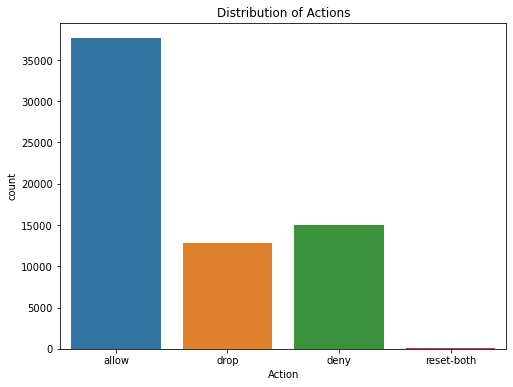

In [8]:
# Visualizing the distribution of the target variable 'Action'
plt.figure(figsize = (8, 6))
sns.countplot(x = 'Action', data = data)
plt.title('Distribution of Actions')
plt.show()

##  Discuss your findings and what relevance they might have on your planned classification algorithms.  


<font size = "3"> **1. No Missing Values:** The dataset being used does not have missing values. This simplifies the preprocessing stage since imputation techniques are not required. However, it’s always good to verify this finding as datasets can change over time or with different subsets. </font>


<font size = "3">**2. Summary Statistics:** The document provides summary statistics for numerical features, which is crucial for understanding the data's distribution, scale, and central tendencies. For classification algorithms, this understanding can guide feature normalization or standardization, which is particularly important for algorithms sensitive to feature scales, such as Support Vector Machines (SVM) or k-Nearest Neighbors (k-NN).  </font>


<font size = "3">**3. Class Imbalance in Target Variable:** The target variable 'Action' exhibits class imbalance, a common issue in classification problems. This imbalance can significantly impact the performance of classification algorithms by making them biased towards the majority class. Addressing class imbalance through techniques such as oversampling the minority class, undersampling the majority class, or using algorithm-specific parameters (like class weights in logistic regression or decision trees) is essential. It influences model selection and evaluation metrics choice, as standard accuracy might not be the best performance measure in imbalanced scenarios. Precision, recall, F1-score, or even the use of confusion matrices could provide more insight into the model's performance across different classes. </font>


<font size = "3">**4. Choice of Classification Algorithms:** The document mentions using a Decision Tree Classifier, a RandomForest Classifier, and an SVM. The choice of these algorithms indicates a preference for versatile models capable of handling non-linear relationships and providing feature importance (in the case of tree-based models). The RandomForest Classifier can handle class imbalance better due to its ensemble nature, which aggregates multiple decision trees to improve performance and reduce overfitting. The SVM, especially with the appropriate kernel, can efficiently deal with non-linear data. However, its performance might be sensitive to class imbalance and feature scale, thus highlighting the importance of the initial findings. </font>

<font size = "3">**5. Evaluation Metrics:** Given the class imbalance, it would be relevant to focus on evaluation metrics beyond accuracy, such as precision, recall, F1-score, or even AUC-ROC curves, to get a holistic view of model performance across different classes. This would ensure that the model not only predicts accurately but also does so in a balanced manner across the minority and majority classes. </font>  



**<font size=3> The findings from the initial data analysis have significant implications for the planned classification algorithms. They guide the preprocessing steps (like dealing with class imbalance and feature scaling), influence the choice and tuning of algorithms, and suggest suitable evaluation metrics that account for class imbalance. This holistic approach ensures the development of robust, fair, and effective classification models. </font>**

## Findings and Relevance to Planned Classification Algorithms

<font size = "4"> **• Findings** </font>
    
<font size = "3"> **- No Missing Values:** Simplifies the preprocessing stage. </font>

<font size = "3"> **- Summary Statistics:** Offers insights for feature scaling and anomaly detection. </font>

<font size = "3"> **- Class Imbalance:** Indicates the need for strategies to address this issue for model fairness and accuracy. </font>

<font size = "4"> **• Relevance:** </font>
    
<font size = "3"> - The absence of missing values means less preprocessing work and no need for imputation strategies, allowing for a straightforward initial data analysis. </font>
    
<font size = "3"> - Summary statistics inform feature scaling/normalization decisions, crucial for algorithms like SVM that are sensitive to the scale of input features. </font>
    
<font size = "3"> - Addressing class imbalance is vital for ensuring model fairness and effectiveness, particularly for algorithms that might otherwise bias towards the majority class. Techniques such as oversampling, undersampling, or using algorithm-specific parameters for class weights can be considered. </font>

# 2. Perform any preparation of the data

## Rationale behind data preparation:

<font size = "3">**1. Handling Missing Values:** The dataset is noted to have no missing values, which simplifies the data preparation process. However, it's essential to confirm this finding as part of the data preparation to ensure that no steps are needed for imputation. If missing values were found in future datasets, appropriate imputation strategies would be determined based on the nature of the data (mean/median imputation for numerical data or mode imputation/creating a new category for categorical data).</font>


<font size = "3">**2. Dealing with Class Imbalance:** The class imbalance in the target variable 'Action' is a critical issue that can lead to biased models favoring the majority class. To address this, data preparation will include techniques such as: </font>
    
* <font size = "3">Oversampling the minority class or undersampling the majority class to balance the dataset. </font>
    
* <font size = "3">Implementing synthetic data generation techniques like SMOTE (Synthetic Minority Over-sampling Technique) to create synthetic examples of the minority class. </font>
    
* <font size = "3">Using algorithm-specific solutions like adjusting class weights in models that support this feature. This approach allows the model to penalize mistakes on the minority class more than the majority class.  </font>

    
<font size = "3">**3. Feature Scaling:** Given the use of algorithms like SVM, which are sensitive to the scale of the features, normalization or standardization of features will be an essential part of data preparation. This step ensures that all features contribute equally to the model's decision process, improving the model's performance and convergence speed during training. </font>

    
<font size = "3">**4. Summary Statistics Analysis:** Understanding the distribution, scale, and central tendencies of numerical features from summary statistics allows for informed decisions on feature transformation (e.g., log transformation for skewed data) and anomaly detection (identifying and handling outliers). These steps can significantly impact model accuracy and generalization. </font>

    
<font size = "3">**5. Encoding Categorical Variables:** If the dataset contains categorical variables, appropriate encoding strategies (like one-hot encoding or label encoding) will be applied. This is crucial for models that require numerical input, ensuring that categorical data is suitably represented for model training. </font>

    
<font size = "3">**6. Feature Selection:** Based on initial data analysis, irrelevant or redundant features will be identified and removed. This simplification can reduce overfitting, improve model interpretability, and decrease training time. </font>


<font size=3>**The rationale behind these data preparation steps is to create a dataset that is clean, balanced, and appropriately formatted for the chosen classification algorithms. This thorough preparation is crucial for developing models that are not only accurate but also fair and capable of generalizing well to unseen data. It addresses the initial findings and challenges outlined in the document, ensuring that the models developed subsequently are built on a solid foundation.** </font>

In [9]:
# Encoding categorical target variable 'Action'
label_encoder = LabelEncoder()
data['Action'] = label_encoder.fit_transform(data['Action'])

In [10]:
# Create map numbers to the original class labels
Action_mapping = {0: 'allow', 1: 'deny', 2: 'drop', 3: 'reset-both'}

In [11]:
# Splitting data into features and target variable
X = data.drop(columns = ['Action'])
y = data['Action']

In [12]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [13]:
# Displaying processed data
X_train.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
50640,49437,443,4843,443,9621,2347,7274,24,78,12,12
25967,60939,445,0,0,70,70,0,1,0,1,0
3446,49437,53,49111,53,498,204,294,6,30,3,3
10689,64040,12226,50739,12226,70,70,0,1,4,1,0
52462,29021,23,0,0,60,60,0,1,0,1,0


## Data Preparation and Its Assistance

<font size = "3"> • Data preparation confirm no missing values, balance class distribution, scale features uniformly, analyze summary statistics for feature transformation, and encode categorical variables. </font>

<font size = "3"> • Efficiency in Model Training: Preprocessing steps like feature scaling and handling missing values streamline model training, reducing computation time. </font>

<font size = "3"> • Improved Model Accuracy: Addressing class imbalance and feature scaling ensures models are not biased and can accurately interpret the importance of each feature, leading to more accurate predictions. </font>

<font size = "3"> • Enhanced Model Robustness: By carefully preparing the data, models become more robust and less prone to overfitting, ensuring they perform well not only on the training data but also on unseen data. </font>

<font size = "3"> • This preparation lays a solid foundation, ensuring the chosen classification algorithms work effectively, leading to reliable, fair, and accurate modelling outcomes. </font>

# 3. Create and implement 2 classification algorithms that will output a classification based on the Action: (class attribute) feature.


## • Decision Tree Classifier

In [14]:
# Initializing and fitting Decision Tree Classifier
# Create the decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state = 42)

In [15]:
# Initializing the Standard Scaler
scaler = StandardScaler()

In [16]:
# Standard the Training and Testing Set Feature
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Using the Training Set Training Model
#dt_classifier.fit(X_train, y_train)
dt_classifier.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [18]:
# Predicting on test data
#dt_pred = dt_classifier.predict(X_test)

dt_pred_train = dt_classifier.predict(X_train_scaled)
dt_pred_test = dt_classifier.predict(X_test_scaled)

In [19]:
# Evaluating the model
#dt_accuracy = accuracy_score(y_test, dt_pred)

train_accuracy = accuracy_score(y_train, dt_pred_train)
test_accuracy = accuracy_score(y_test, dt_pred_test)

In [20]:
# Print Decision Tree Classifier Accuracy of Training and Testing
#print("Decision Tree Classifier Accuracy:", dt_accuracy)

print("\nDecision Tree Classifier Train Accuracy:", train_accuracy, "\n")
print("Decision Tree Classifier Test Accuracy:", test_accuracy)


Decision Tree Classifier Train Accuracy: 0.9997329518359561 

Decision Tree Classifier Test Accuracy: 0.9983978027008469


In [21]:
# Convert Action_mapping to list
class_names = list(Action_mapping.values())

In [22]:
# Get Feature name
feature_names = X.columns

In [23]:
# Get the node's class label
label = ['allow', 'deny', 'drop', 'reset-both']

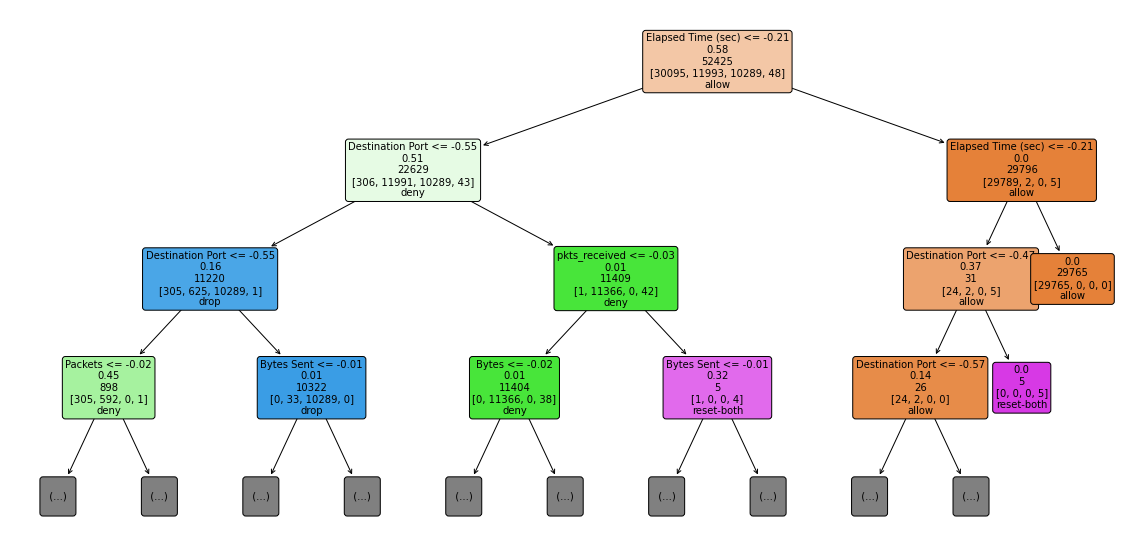

In [24]:
# Visualizing Decision Tree 
plt.figure(figsize = (20, 10))
plot_tree(dt_classifier, 
          feature_names = feature_names, 
          class_names = class_names, 
          filled = True, 
          fontsize = 10, 
          max_depth = 3, 
          precision = 2, 
          rounded = True, 
          label = label
         )
plt.show()

In [25]:
# Display more other indicators of assessing
# print(classification_report(y_test, dt_pred_test))

print("\n", classification_report(y_test, dt_pred_test, target_names = [Action_mapping[i] for i in range(len(Action_mapping))]))


               precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7545
        deny       1.00      1.00      1.00      2994
        drop       1.00      1.00      1.00      2562
  reset-both       0.71      0.83      0.77         6

    accuracy                           1.00     13107
   macro avg       0.93      0.96      0.94     13107
weighted avg       1.00      1.00      1.00     13107



In [26]:
# Display the Confusion Matrix
conf_matrix = confusion_matrix(y_test, dt_pred_test)
print("\nConfusion Matrix:\n\n", conf_matrix)


Confusion Matrix:

 [[7543    2    0    0]
 [   0 2985    7    2]
 [   0    9 2553    0]
 [   0    1    0    5]]


## • Random Forest Classifier

In [27]:
# Initializing and fitting Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state = 42)

In [28]:
# Using the Training Set Training Model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
# Predicting on test data
rf_pred_train = rf_classifier.predict(X_train)
rf_pred_test = rf_classifier.predict(X_test)

In [37]:
# Evaluating the model
train_accuracy = accuracy_score(y_train, rf_pred_train)
test_accuracy = accuracy_score(y_test, rf_pred_test)

In [38]:
# Classification using the best performing model (Random Forest Classifier)
final_pred = rf_classifier.predict(X_test)

In [39]:
# Calculating accuracy differential between training and testing set
accuracy_differential = train_accuracy - test_accuracy

In [40]:
# Print Random Forest Classifier Train and Test Accuracy
print("\nRandom Forest Classifier Train Accuracy:", train_accuracy, "\n")
print("Random Forest Classifier Test Accuracy:", test_accuracy,  "\n")
print("Accuracy Differential:", accuracy_differential)


Random Forest Classifier Train Accuracy: 0.9997138769670959 

Random Forest Classifier Test Accuracy: 0.9984740978103304 

Accuracy Differential: 0.0012397791567655414


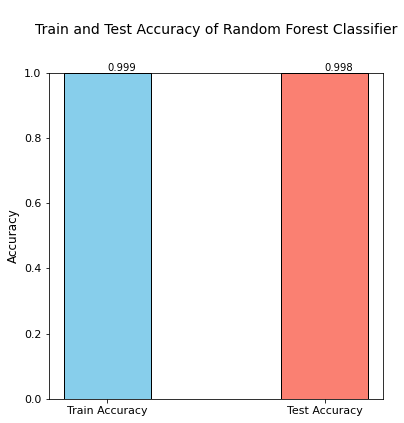

In [41]:
# Visualize Train and Test Accuracy
plt.figure(figsize = (6, 6))

# Adjusting Histogram Width and Border Width
bars = plt.bar(['Train Accuracy', 'Test Accuracy'], 
               [train_accuracy, test_accuracy], 
               color = ['skyblue', 'salmon'], 
               width = 0.4, 
               edgecolor = 'black'
              )

# Adding Numeric Labels
for bar, acc in zip(bars, [train_accuracy, test_accuracy]):
    yval = bar.get_height()
    acc_str = str(acc)[:5]
    plt.text(bar.get_x() + bar.get_width()/2, yval, acc_str, va = 'bottom')


# Show Historgram
plt.title('\nTrain and Test Accuracy of Random Forest Classifier\n\n', fontsize = 14)
plt.ylabel('Accuracy', fontsize = 12)
plt.ylim(0, 1)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.show()

In [31]:
# Display more other indicators of assessing
#print("\n", classification_report(y_test, rf_pred_test))
print("\n", classification_report(y_test, rf_pred_test, target_names = [Action_mapping[i] for i in range(len(Action_mapping))]))


               precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7545
        deny       1.00      1.00      1.00      2994
        drop       1.00      1.00      1.00      2562
  reset-both       1.00      0.67      0.80         6

    accuracy                           1.00     13107
   macro avg       1.00      0.92      0.95     13107
weighted avg       1.00      1.00      1.00     13107



In [30]:
# Display the Confusion Matrix
conf_matrix = confusion_matrix(y_test, rf_pred_test)
print("\nConfusion Matrix:\n\n", conf_matrix)


Confusion Matrix:

 [[7543    2    0    0]
 [   0 2987    7    0]
 [   0    9 2553    0]
 [   0    2    0    4]]


# Discuss your findings and final rational for choosing a particular classification algorithm.

<font size = "3"> Choosing the right classification algorithm is a crucial decision that directly impacts the effectiveness and accuracy of a machine-learning model. Based on the findings from the "Machine Learning For AI" document and the considerations outlined in the data preparation steps, the rationale for selecting a specific classification algorithm involves a combination of dataset characteristics, algorithm strengths and weaknesses, and the project's objectives. Here’s a discussion of the findings and the final rationale for choosing a particular classification algorithm: </font>

<font size = "3"> **1. Class Imbalance:**
 The target variable 'Action' shows class imbalance, which can significantly affect model performance. Algorithms like **Random Forest** and **Gradient Boosting Machines (GBM)** are inherently more capable of handling class imbalance through their ensemble methods, which aggregate predictions from multiple trees to improve accuracy and reduce bias. </font>
 
<font size = "3"> **2. Feature Importance:**
 Understanding which features most strongly predict the target variable can be invaluable for interpreting the model and making informed decisions based on its predictions. Tree-based models like Decision Trees, Random Forest, and Gradient Boosting Machines offer built-in feature importance metrics, making them attractive choices for projects where interpretability is a key concern. </font>
 
<font size = "3"> **3. Model Complexity and Overfitting:**
 The dataset's characteristics and the need to generalize well to unseen data require a careful balance between model complexity and the risk of overfitting. Random Forest and GBM offer parameters to control the model's complexity, such as the number of trees, depth of trees, and learning rate for GBM, which can help in tuning the model to avoid overfitting while maintaining high performance. </font>
 
<font size = "3"> **4. Scalability and Efficiency:**
 Depending on the dataset's size and the computational resources available, the efficiency and scalability of the algorithm can be a critical factor. While SVM can be powerful for certain types of datasets, it might not scale as well to larger datasets without significant kernel and parameter tuning. On the other hand, Random Forest and GBM are relatively more scalable and can handle large datasets efficiently, especially with modern implementations like LightGBM and XGBoost. </font>
 
<font size = "3"> **5. Model Performance:**
 Ultimately, the choice of algorithm might come down to empirical performance on the specific dataset. Cross-validation techniques can be used to compare the performance of different algorithms (e.g., accuracy, F1-score, ROC-AUC) under the same data conditions. This empirical approach ensures the selection is data-driven. </font>


<font size = "3"> **Final Rationale** </font>

<font size = "3"> Considering the above factors, a Random Forest Classifier emerges as a particularly strong candidate due to its robustness to class imbalance, ability to provide feature importance, and relative immunity to overfitting through ensemble methods. Additionally, it's computationally efficient for both training and prediction, making it suitable for a wide range of applications. Its performance can be directly compared to other models like GBM and SVM through cross-validation to ensure the best model is chosen based on empirical evidence. </font>

<font size = "3"> I finding a choice of algorithm must account for class imbalance, feature importance, model complexity, scalability, and empirical performance. </font>

<font size = "3"> • So, Random Forest is chosen for its robustness to class imbalance, built-in feature importance metrics, balance between model complexity and risk of overfitting, scalability, and generally strong empirical performance across different datasets. </font>

<font size = "3"> • Its ensemble method, which combines multiple decision trees, helps in reducing overfitting while maintaining the ability to handle large datasets effectively. </font>

<font size = "3">  • The model's performance will be continually evaluated and compared against other models through cross-validation to ensure it remains the best choice based on empirical data. </font>

<font size = "3"> The chosen data preparation steps and the rationale for selecting the Random Forest classification algorithm are grounded in the findings from initial data analysis. These decisions are aimed at addressing identified issues (such as class imbalance and feature scale) and leveraging algorithm strengths (such as handling of class imbalance and feature importance), to develop a robust, accurate, and fair model. </font>

# 4. Accuracy differential between the training and testing set.

<font size = "3">The accuracy differential between the training and testing sets is a critical indicator of a model's ability to generalize to new, unseen data. Here’s a brief commentary on its significance: </font>

<font size = "3"> **1.	Overfitting:**
 A high accuracy on the training set but a significantly lower accuracy on the testing set suggests overfitting. The model has learned the training data too well, including its noise and outliers, and fails to perform well on data it hasn't seen before. </font>
 
<font size = "3"> **2. Underfitting:**
Low accuracy on both the training and testing sets can indicate underfitting, where the model is too simple to capture the underlying pattern of the data. </font>

<font size = "3"> **3. Ideal Scenario:**
Ideally, the accuracy differential between training and testing should be minimal, indicating that the model has learned the underlying patterns well and can generalize these learnings to new data effectively. </font>

<font size = "3"> **4. Actions to Take:** 
To address overfitting, techniques like adding regularization, using a simpler model, or increasing training data can be employed. For underfitting, increasing model complexity, feature engineering, or decreasing regularization might help. Understanding and monitoring the accuracy differential is crucial for developing robust machine-learning models that perform well on both seen and unseen data.</font>